# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 14.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=a205bff9cf68542e16cfec40003ecce34c50764959360ef5247dd7a61b5eb72b
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [3]:
if not os.path.exists("malgun.ttf"): 
    wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
    fm.fontManager.addfont("malgun.ttf")
if plt.rcParams['font.family']!= ["Malgun Gothic"]:
    plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [4]:
os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [5]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (48.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and dir

In [6]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [8]:
path = '/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/train.csv'
data = pd.read_csv(path)
data.tail()

,text,label
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",코드2
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,시스템 운영
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,이론
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,원격
3705,상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...,이론


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [24]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.4 MB/s eta 0:00:00


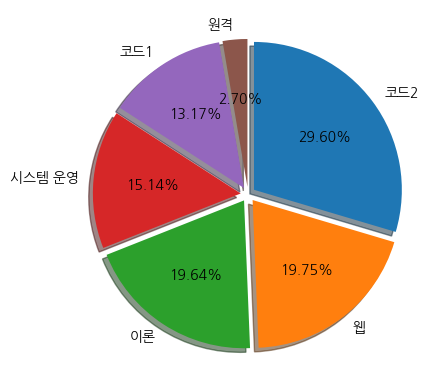

In [25]:
# 문의 유형 분포 확인
import matplotlib.pyplot as plt
import koreanize_matplotlib

temp = data['label'].value_counts()

plt.pie(temp.values, labels = temp.index, autopct = '%.2f%%',
        startangle = 90, counterclock = False,
        explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05], shadow = True)
plt.show()

In [15]:
# 라벨 분포 확인... sns.countplot 쓰니까 오류남 그래서 이걸로 확인
data['label'].value_counts()

코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64

In [12]:
# data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [13]:
# 결측치 확인
data.isna().sum()

text     0
label    0
dtype: int64

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [27]:
# 문의 내용 길이 분포 확인
text = np.array(data['text']) 
text

array(['self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, 100)) for K in Ks])\n1. 여기서 커널사이즈 K,100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다.',
       '현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요... 막혀서 뭘 할 수가 없네요.. 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다. 이유가 뭘까요',
       'glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 포함되면 제대로 작동하지 않는 것 같아 질문 드립니다.\n\n제공해주신 파일에 AIVLE_3rd[Team] 폴더가 포함되어 있는데, 이 폴더 안에는 glob이 정상적으로 작동하지 않습니다.',
       ...,
       '수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프라 구조에 대해서 이해해보는 시간\n- 비록 직접 인프라를 구축 및 설계는 하지 않을지라도 어떻게 구성되어 있고 어떻게 돌아가는지는 알아보자.\n적절한 비유일지는 모르겠으나, 운전을 하는 게 목표라고 할 때, \n우리가 자동차를 직접 설계하고 만들지는 않아도 자동차가 연료를 연소시키면서 엔진에 동력을 전달해서 그 힘으로 움직인다. 라는 식으로 원리와 과정을 아는 것과 같은 맥락...이려나요?\n\n2. (DX과정이므로 DX 컨설턴트 및 관련 직무를 위한 교육이라고 가정할 때) DX 관련 업무에서 실제로 IT 인프라를 구축해야하는 경우가 있으며, 이 때 실제 장비를 가지고 하나씩 연결해보고 시도해보기에는 물리적(시간, 돈, 장소 등)제약이 있으므로 가상으로 해본다.\n\n3. 적절한 비유일지는 모르겠으나...\n수학에서 미적분을 배우는 게 최종 목표라고 했을 때, 처음부터 미적분을 학습시킬 수 없으니 그 기초가 되는 수열, 수열의 극한, 함수의 극한 순으로 배

In [29]:
length = []
for txt in text:
    txtLength = len(txt)
    length.append(txtLength)

print(length)

[144, 119, 147, 279, 144, 131, 161, 325, 430, 134, 127, 183, 42, 348, 101, 233, 154, 119, 318, 61, 97, 54, 120, 198, 267, 59, 257, 1237, 265, 238, 333, 101, 281, 185, 138, 180, 83, 187, 102, 436, 142, 183, 48, 69, 555, 73, 114, 272, 51, 158, 61, 118, 141, 75, 81, 321, 70, 239, 180, 108, 35, 123, 257, 77, 99, 158, 13, 133, 116, 117, 75, 263, 38, 1188, 166, 61, 43, 79, 68, 349, 179, 117, 223, 56, 41, 391, 304, 196, 226, 27, 673, 118, 348, 835, 249, 95, 67, 1122, 83, 102, 65, 142, 63, 858, 90, 222, 271, 40, 448, 50, 95, 56, 97, 84, 277, 104, 806, 45, 71, 103, 55, 142, 135, 546, 345, 59, 42, 356, 288, 181, 117, 92, 83, 98, 74, 280, 44, 33, 264, 148, 105, 438, 170, 52, 61, 117, 138, 54, 257, 192, 262, 68, 101, 75, 67, 165, 284, 39, 133, 70, 133, 33, 246, 126, 127, 512, 27, 78, 52, 54, 622, 112, 71, 237, 71, 254, 191, 57, 43, 58, 116, 240, 391, 108, 67, 61, 105, 129, 97, 101, 113, 67, 187, 56, 603, 119, 87, 107, 68, 948, 199, 81, 34, 93, 54, 107, 128, 111, 1028, 257, 108, 165, 51, 574, 73, 5

In [42]:
# 최소 길이 index 및 문의 내용 확인
# min_value = min(length)
# min_index = length.index(min_value)
# print('최소 길이 index : ', min_index)

# 최소 길이 중복된 것도 있을 것 확인
indices_min = []

min_value = min(length)

for i in range(len(length)):
    if length[i] == min_value:
        indices_min.append(i)

print('최소 길이 index : ', indices_min)

print('756 : ', text[indices_min[0]])
print('841 : ', text[indices_min[1]])

최소 길이 index :  [756, 841]
756 :  원격 부탁드립니다
841 :  지원부탁드립니다!


In [47]:
# 최대 길이 index 및 문의 내용 확인
indices_max = []

max_value = max(length)

for i in range(len(length)):
    if length[i] == max_value:
        indices_max.append(i)

print('최대 길이 index : ', indices_max)

print('2561 : ', text[indices_max[0]])

최대 길이 index :  [2561]
2561 :  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)
   1768             plot_kws["color"] = color
   1769 
-&gt; 1770         p.plot_univariate_densi

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
for label in sorted(train_df.label.unique()):
    text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

### 5-2. Train Validation split

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용